In [1]:
# import packages and suppress warnings

suppressPackageStartupMessages(library(pathfindR))
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(biomaRt))
suppressPackageStartupMessages(library(limma))
suppressPackageStartupMessages(library(ggplot2))

In [2]:
# define directories

pathfindR_dir = "/Volumes/Expansion/Thesis Work/Results/Transfer Learning/Drugs with same pathways/CYTOi/Expression_CNA/pathfindR/GDSC_PDX_TCGA_Second_Strategy/"
gdsc_dir = "/Volumes/Expansion/Thesis Work/Supplementary Files/GDSC/"
exp_dir = "/Volumes/Expansion/Thesis Work/Results/preprocessed_results2/exprs/"

In [3]:
# create directory for pathfindR analysis and change to that directory

dir.create(pathfindR_dir, showWarnings = FALSE)
setwd(pathfindR_dir)
getwd()

[1] "/Volumes/Expansion/Thesis Work/Results/Transfer Learning/Drugs with same pathways/CYTOi/Expression_CNA/pathfindR/GDSC_PDX_TCGA_Second_Strategy"

In [4]:
# read DEGs table of paclitaxel (CYTOi)

input_df <- read.delim(paste0(pathfindR_dir, "/GDSC_Expression_CNA_Filtered_DEGs_Table_CYTOi_Paclitaxel_Second_Strategy.tsv"))
input_df <- input_df[,c("symbol","logFC","adj.P.Val")]

head(input_df, 3)

,symbol,logFC,adj.P.Val
,<chr>,<dbl>,<dbl>
1,CFAP251,-1.2643762,6.685337e-07
2,GJB5,-0.9991675,2.138124e-05
3,TACSTD2,-3.1706201,2.138124e-05


## Testing input

The input looks OK

## Processing input. Converting gene symbols,
          if necessary (and if human gene symbols provided)

Number of genes provided in input: 801

Number of genes in input after p-value filtering: 149



Could not find any interactions for 84 (56.38%) genes in the PIN

Final number of genes in input: 65

## Performing Active Subnetwork Search and Enrichment

## Processing the enrichment results over all iterations

## Annotating involved genes and visualizing enriched terms

## Creating HTML report



processing file: results.Rmd



1/3        
2/3 [setup]
3/3        


output file: results.knit.md




/opt/homebrew/bin/pandoc +RTS -K512m -RTS results.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc12e02263f5567.html --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/table-classes.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --template /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/fg/9tfxwbns2z9bny6_29d9jxyc0000gn/T//Rtmpj3YDkk/rmarkdown-str12e023db1ccb.html 



Output created: results.html



processing file: enriched_terms.Rmd



1/4        
2/4 [setup]
3/4        
4/4 [table]


output file: enriched_terms.knit.md




/opt/homebrew/bin/pandoc +RTS -K512m -RTS enriched_terms.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc12e021cfe557e.html --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/table-classes.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --template /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/fg/9tfxwbns2z9bny6_29d9jxyc0000gn/T//Rtmpj3YDkk/rmarkdown-str12e027b4d7fc0.html 


Output created: enriched_terms.html



processing file: conversion_table.Rmd



1/6                              
2/6 [setup]                      
3/6                              
4/6 [converted_tbl, table1]      
5/6                              
6/6 [gene_wo_interaction, table2]


output file: conversion_table.knit.md




/opt/homebrew/bin/pandoc +RTS -K512m -RTS conversion_table.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc12e0216bf03bd.html --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/latex-div.lua --lua-filter /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmarkdown/lua/table-classes.lua --embed-resources --standalone --variable bs3=TRUE --section-divs --template /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /var/folders/fg/9tfxwbns2z9bny6_29d9jxyc0000gn/T//Rtmpj3YDkk/rmarkdown-str12e022ad7349c.htm


Output created: conversion_table.html

Plotting the enrichment bubble chart

Found 95 enriched terms



You may run:


- cluster_enriched_terms() for clustering enriched terms


- visualize_terms() for visualizing enriched term diagrams





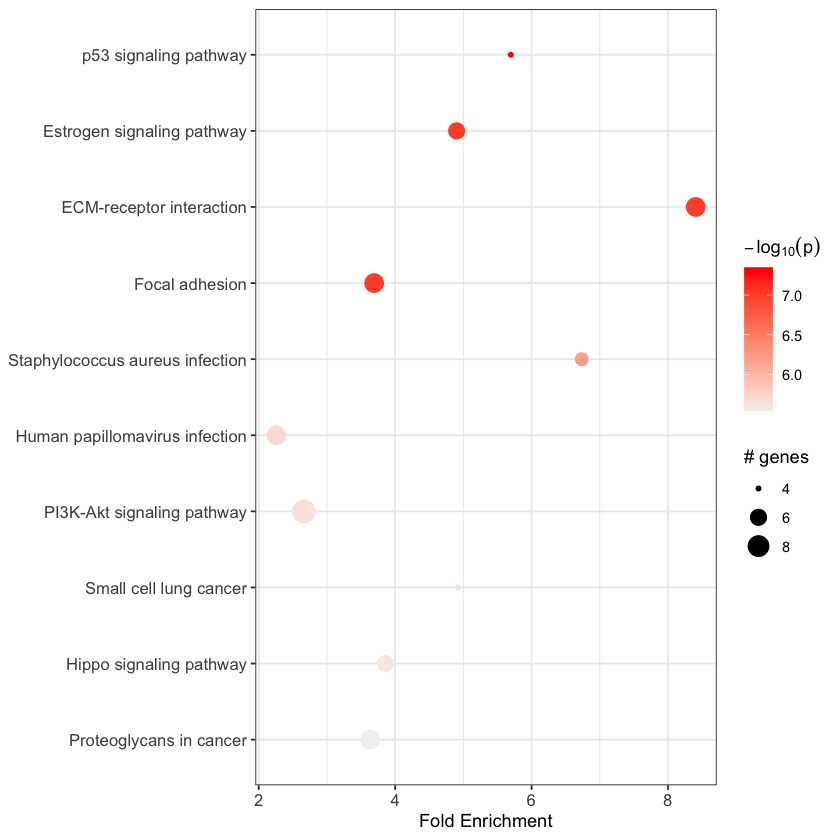

In [5]:
# run pathfindR

output_df <- run_pathfindR(input_df, 
                            output_dir = paste(pathfindR_dir,"KEGG",sep="/"),
                            pin_name_path = "KEGG",
                            adj_method = "fdr",
                            enrichment_threshold = 0.05,
                            min_gset_size = 5,
                            max_gset_size = 500,
                            iterations = 25,
                            gene_sets= "KEGG")

In [6]:
# show pathfindR output

knitr::kable(head(output_df, 5))



|ID       |Term_Description                | Fold_Enrichment| occurrence|   support| lowest_p| highest_p|Up_regulated |Down_regulated                                 |
|:--------|:-------------------------------|---------------:|----------:|---------:|--------:|---------:|:------------|:----------------------------------------------|
|hsa04115 |p53 signaling pathway           |        5.695824|         25| 0.0227273|    0e+00|     0e+00|             |SFN, SERPINB5, THBS1, SERPINE1                 |
|hsa04915 |Estrogen signaling pathway      |        4.902144|         25| 0.0909091|    1e-07|     1e-07|             |EGFR, KRT13, KRT14, KRT15, KRT18, KRT19        |
|hsa04512 |ECM-receptor interaction        |        8.406488|         25| 0.0227273|    1e-07|     1e-07|             |LAMB2, LAMB3, LAMC2, THBS1, SDC4, ITGA2, DSPP  |
|hsa04510 |Focal adhesion                  |        3.691738|         25| 0.1136364|    1e-07|     1e-07|             |ITGA2, LAMB2, LAMB3, LAMC2, THBS1, EGFR

Plotting the enrichment bubble chart



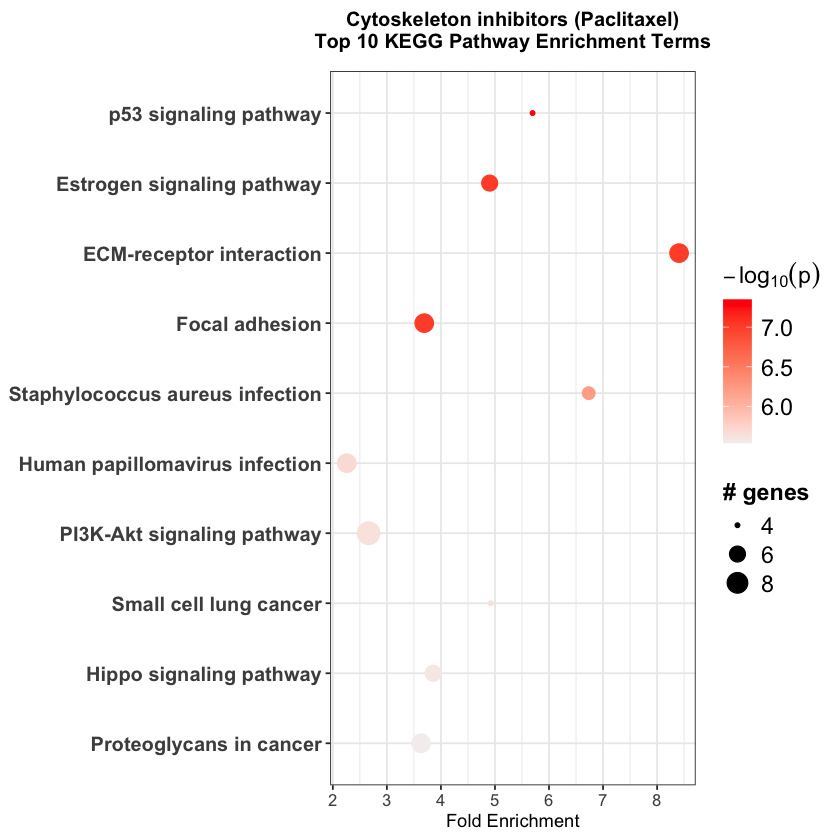

In [7]:
# plot fold enrichment results

fold_enrichment_figure <- enrichment_chart(
    result_df = output_df,
    top_terms = 10
) + 
ggplot2::ggtitle("Cytoskeleton inhibitors (Paclitaxel)\nTop 10 KEGG Pathway Enrichment Terms\n") +  
ggplot2::theme(
    plot.title = element_text(size = 12, face = "bold", hjust = 0.5),           
    axis.text.y = ggplot2::element_text(size = 12, face = "bold"),              
    legend.title = ggplot2::element_text(size = 14, face = "bold"),             
    legend.text = ggplot2::element_text(size = 14),                             
    #legend.key.size = ggplot2::unit(1, "cm")  
) +
ggplot2::scale_x_continuous(
    breaks = c(2, 3, 4, 5, 6, 7, 8),  # Custom x-axis tick values
    labels = c("2", "3", "4", "5", "6", "7", "8")  # Optional: Custom labels
)

# Save the plot as a PDF file
ggplot2::ggsave(
  filename = paste0(pathfindR_dir, "/KEGG/Fold Enrichment (n = 10).pdf"),
  plot = fold_enrichment_figure,             
  width = 10,  
  height = 6   
)

# Display the plot
print(fold_enrichment_figure)

In [8]:
# cluster enriched terms

pathfindR_output_clustered <- cluster_enriched_terms(output_df, 
                                                     plot_dend = FALSE, 
                                                     plot_clusters_graph = FALSE)

knitr::kable(head(pathfindR_output_clustered, 2))

The maximum average silhouette width was 0.44 for k = 40 







|ID       |Term_Description           | Fold_Enrichment| occurrence|   support| lowest_p| highest_p|Up_regulated |Down_regulated                          | Cluster|Status         |
|:--------|:--------------------------|---------------:|----------:|---------:|--------:|---------:|:------------|:---------------------------------------|-------:|:--------------|
|hsa04115 |p53 signaling pathway      |        5.695824|         25| 0.0227273|    0e+00|     0e+00|             |SFN, SERPINB5, THBS1, SERPINE1          |       1|Representative |
|hsa04915 |Estrogen signaling pathway |        4.902144|         25| 0.0909091|    1e-07|     1e-07|             |EGFR, KRT13, KRT14, KRT15, KRT18, KRT19 |       2|Representative |

In [9]:
## The representative terms

head(knitr::kable(pathfindR_output_clustered[pathfindR_output_clustered$Status == "Representative", ]), 5)

[1] "|   |ID       |Term_Description                                           | Fold_Enrichment| occurrence|   support|  lowest_p| highest_p|Up_regulated   |Down_regulated                                 | Cluster|Status         |"
[2] "|:--|:--------|:----------------------------------------------------------|---------------:|----------:|---------:|---------:|---------:|:--------------|:----------------------------------------------|-------:|:--------------|"
[3] "|1  |hsa04115 |p53 signaling pathway                                      |       5.6958242|         25| 0.0227273| 0.0000000| 0.0000000|               |SFN, SERPINB5, THBS1, SERPINE1                 |       1|Representative |"
[4] "|2  |hsa04915 |Estrogen signaling pathway                                 |       4.9021438|         25| 0.0909091| 0.0000001| 0.0000001|               |EGFR, KRT13, KRT14, KRT15, KRT18, KRT19        |       2|Representative |"
[5] "|3  |hsa04512 |ECM-receptor interaction                                   |       8.4064875|         25| 0.0227273| 0.0000001| 0.0000001|               |LAMB2, LAMB3, LAMC2, THBS1, SDC4, ITGA2, DSPP  |       3|Representative |"

In [10]:
# show output of pathfindR clustered table

head(pathfindR_output_clustered, 3)

,ID,Term_Description,Fold_Enrichment,occurrence,support,lowest_p,highest_p,Up_regulated,Down_regulated,Cluster,Status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>
1,hsa04115,p53 signaling pathway,5.695824,25,0.02272727,4.497592e-08,4.497592e-08,,"SFN, SERPINB5, THBS1, SERPINE1",1,Representative
2,hsa04915,Estrogen signaling pathway,4.902144,25,0.09090909,9.595092e-08,9.595092e-08,,"EGFR, KRT13, KRT14, KRT15, KRT18, KRT19",2,Representative
5,hsa05150,Staphylococcus aureus infection,6.734927,25,0.02272727,6.174326e-07,6.174326e-07,,"KRT13, KRT14, KRT15, KRT18, KRT19",2,Member


In [11]:
# plot only selected clusters for better visualization

selected_clusters <- subset(pathfindR_output_clustered, Cluster %in% 1:5)
gg_list <- enrichment_chart(selected_clusters, plot_by_cluster = TRUE)  

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Clustered Bubble Plot.pdf",sep="/"),
  gg_list,             
  width = 10,                                   
  height = 6                                    
) 

Plotting the enrichment bubble chart



# GDSC ###

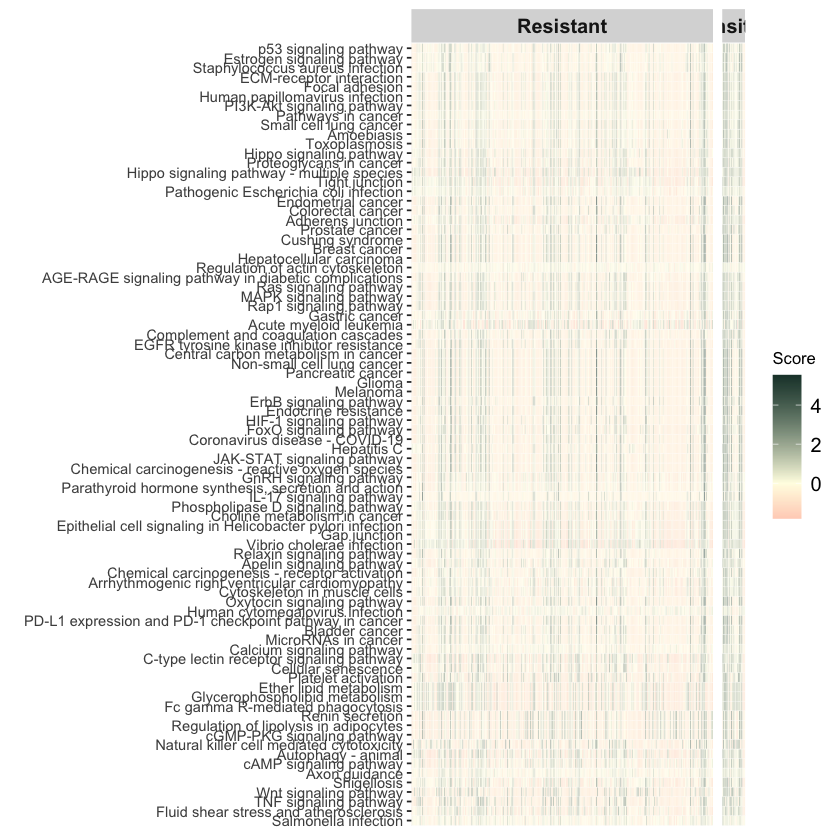

In [12]:
# read GDSC expression matrix and sample files

gdsc_experiment_matrix <- read.delim(paste(pathfindR_dir, "GDSC_Experiment_Matrix_CYTOi_Paclitaxel_Second_Strategy.tsv", sep = "/"))
colnames(gdsc_experiment_matrix)[2:ncol(gdsc_experiment_matrix)] <- sub("^X", "", colnames(gdsc_experiment_matrix)[2:ncol(gdsc_experiment_matrix)])
rownames(gdsc_experiment_matrix) <- gdsc_experiment_matrix$symbol
gdsc_experiment_matrix <- gdsc_experiment_matrix[,-1]
gdsc_experiment_matrix <- as.matrix(gdsc_experiment_matrix)
colnames(gdsc_experiment_matrix) <- as.integer(colnames(gdsc_experiment_matrix))

gdsc_cases_data <- read.delim(paste(pathfindR_dir, "GDSC Paclitaxel Samples.tsv", sep ="/"))

filter <- (gdsc_cases_data["Response"] == 0)
cases <- as.character(gdsc_cases_data[filter, "Sample"])

score_matrix <- score_terms(
  enrichment_table = pathfindR_output_clustered,
  exp_mat = gdsc_experiment_matrix,
  cases = cases,
  use_description = TRUE, 
  label_samples = FALSE, 
  case_title = "Resistant", 
  control_title = "Sensitive", 
  low = "#f7797d", # default = "green"
  mid = "#fffde4", # default = "black"
  high = "#1f4037" # default = "red"
)

In [13]:
# plot scores per sample 

hmap <- plot_scores(score_matrix,
                    cases = cases,
                    label_samples = FALSE,
                    case_title = "Resistant", 
                    control_title = "Sensitive", 
                    low = "#f7797d", # default = "green"
                    mid = "#fffde4", # default = "black"
                    high = "#1f4037" # default = "red"
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Scores per Sample Plot (GDSC).pdf",sep="/"),
  hmap,             
  width = 25,                                    
  height = 13                                    
) 

In [14]:
# select some critical enriched terms and export table

terms_significant <- c("Focal adhesion",
                       "Estrogen signaling pathway",
                       "ECM-receptor interaction",
                       "Hippo signaling pathway",
                       "p53 signaling pathway",
                       "PI3K-Akt signaling pathway",
                       "Adherens junction",
                       "Tight junction",
                       "Pyruvate metabolism",
                       "HIF-1 signaling pathway",
                       "Ras signaling pathway",
                       "MAPK signaling pathway",
                       "MicroRNAs in cancer",
                       "Gap junction",
                       "Axon guidance",
                       "TNF signaling pathway",
                       "Motor proteins",
                       "Cytoskeleton in muscle cells",
                       "Wnt signaling pathway",
                       "Regulation of actin cytoskeleton",
                       "Melanogenesis",
                       "FoxO signaling pathway",
                       "Central carbon metabolism in cancer",
                       "Natural killer cell mediated cytotoxicity")
save_filtered <- pathfindR_output_clustered[pathfindR_output_clustered$Term_Description %in% terms_significant,]
write.table(save_filtered,
            paste0(pathfindR_dir, "KEGG/GDSC_Expression_CNA_CYTOi_Paclitaxel_Selected_Significant_Terms_Second_Strategy.tsv"),
            row.names = FALSE,
            quote = FALSE,
            sep = "\t")

In [15]:
# show top terms

head(save_filtered, 3)

,ID,Term_Description,Fold_Enrichment,occurrence,support,lowest_p,highest_p,Up_regulated,Down_regulated,Cluster,Status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>
1,hsa04115,p53 signaling pathway,5.695824,25,0.02272727,4.497592e-08,4.497592e-08,,"SFN, SERPINB5, THBS1, SERPINE1",1,Representative
2,hsa04915,Estrogen signaling pathway,4.902144,25,0.09090909,9.595092e-08,9.595092e-08,,"EGFR, KRT13, KRT14, KRT15, KRT18, KRT19",2,Representative
3,hsa04512,ECM-receptor interaction,8.406487,25,0.02272727,9.742656e-08,9.742656e-08,,"LAMB2, LAMB3, LAMC2, THBS1, SDC4, ITGA2, DSPP",3,Representative


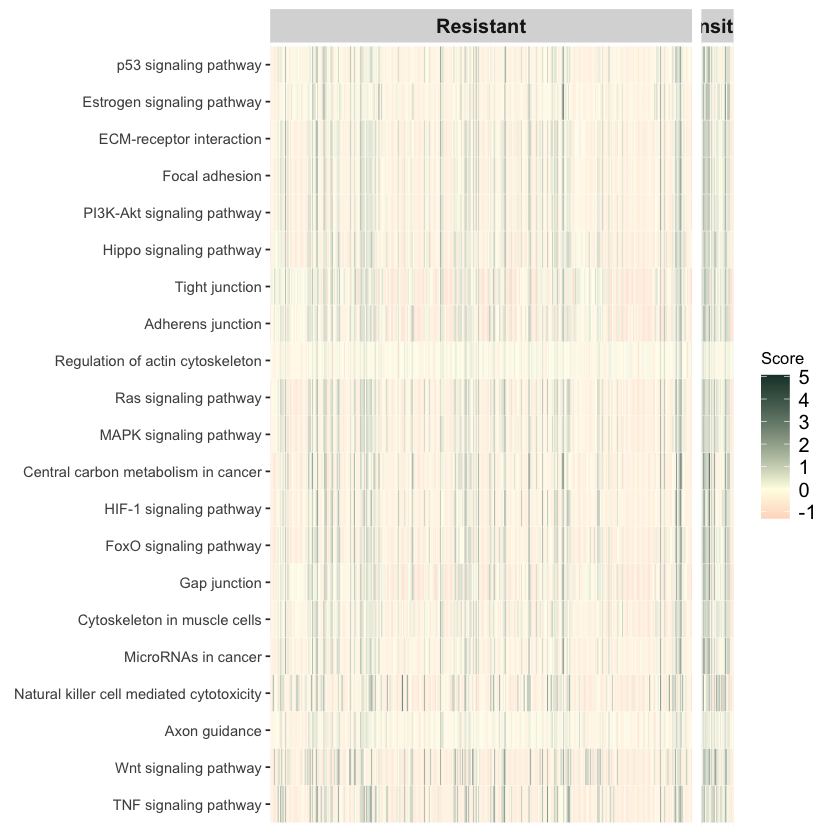

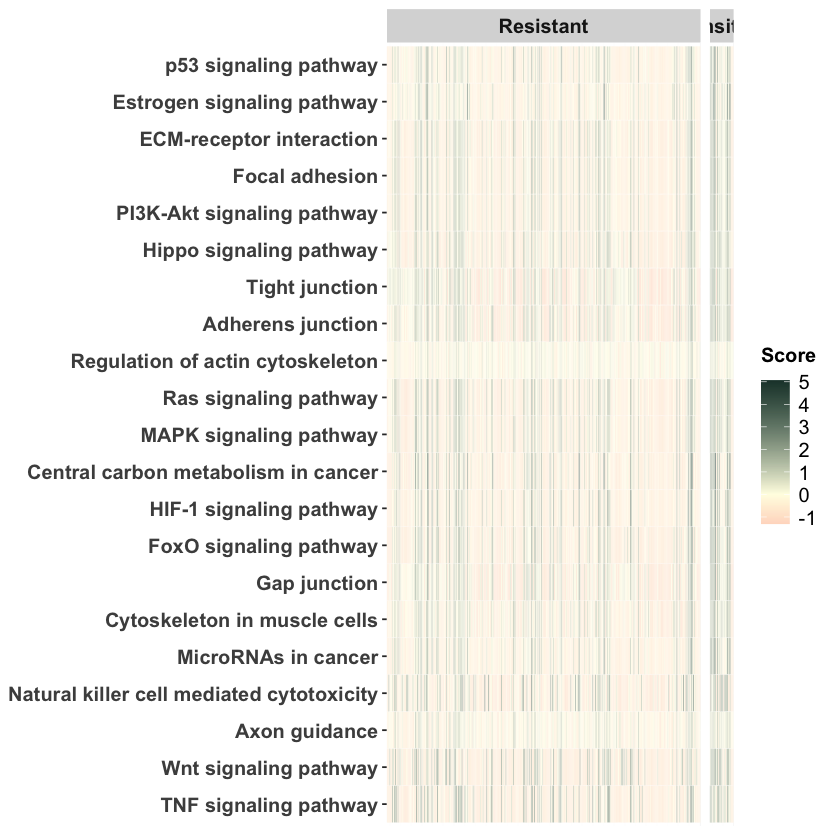

In [16]:
# plot heatmap and assign it to scores_figure

score_matrix_filtered <- score_terms(
  enrichment_table = save_filtered,
  exp_mat = gdsc_experiment_matrix,
  cases = cases,
  use_description = TRUE, 
  label_samples = FALSE,
  case_title = "Resistant", 
  control_title = "Sensitive", 
  low = "#f7797d", # default = "green"
  mid = "#fffde4", # default = "black"
  high = "#1f4037" # default = "red"
)

scores_figure <- plot_scores(
    score_matrix_filtered,
    cases = cases,
    label_samples = FALSE,
    case_title = "Resistant",  
    control_title = "Sensitive", 
    low = "#f7797d", 
    mid = "#fffde4",  
    high = "#1f4037"  
) +
ggplot2::theme(
    legend.title = ggplot2::element_text(
        size = 12, face = "bold", margin = ggplot2::margin(b = 10)  
    ),
    axis.title.y = ggplot2::element_blank(),          
    axis.text.y = ggplot2::element_text(size = 12, face = "bold"), 
    legend.text = ggplot2::element_text(size = 12),                 
    strip.text = ggplot2::element_text(size = 18, face = "bold")    
)

ggplot2::ggsave(
    paste(pathfindR_dir, "KEGG/Scores per Sample Plot (GDSC, selected terms).pdf", sep = "/"),
    scores_figure,
    width = 25,  
    height = 9   
)

scores_figure

In [17]:
# plot term gene heatmap

term_plot <- term_gene_heatmap(output_df, 
                               use_description = TRUE,
                               num_terms = nrow(score_matrix)) +
ggplot2::ggtitle("Cytoskeleton inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Heatmap (# of genes)(GDSC).pdf",sep="/"),
  term_plot,             
  width = 15,                                    
  height = 15                                    
) 

In [18]:
# plot term gene heatmap (sorted by p-value)

term_plot_pvalue <- term_gene_heatmap(output_df, 
                               num_terms = nrow(score_matrix),
                               use_description = TRUE,
                               sort_terms_by_p = TRUE) +
ggplot2::ggtitle("Cytoskeleton inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Heatmap (p-values)(GDSC).pdf",sep="/"),
  term_plot_pvalue,             
  width = 15,                                    
  height = 15                                    
) 

In [19]:
# plot term gene heatmap with top 10 terms

term_plot_top10 <- term_gene_heatmap(output_df, 
                               use_description = TRUE,
                               num_terms = 10) +
ggplot2::ggtitle("Cytoskeleton inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Heatmap (# of genes, top 10)(GDSC).pdf",sep="/"),
  term_plot_top10,             
  width = 15,                                    
  height = 5                                   
) 

In [20]:
# plot term gene heatmap with top 10 terms

term_plot_top10 <- term_gene_heatmap(output_df, 
                               use_description = TRUE,
                               sort_terms_by_p = TRUE,
                               num_terms = 10) +
ggplot2::ggtitle("Cytoskeleton inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Heatmap (p-values, top 10)(GDSC).pdf",sep="/"),
  term_plot_top10,             
  width = 15,                                    
  height = 5                                    
) 

In [21]:
# plot term gene heatmap with selected terms

term_plot_filtered <- term_gene_heatmap(save_filtered, 
                                        use_description = TRUE,
                                        num_terms = nrow(score_matrix_filtered)) +
ggplot2::ggtitle("Cytoskeleton inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Heatmap (# of genes)(GDSC, selected terms).pdf",sep="/"),
  term_plot_filtered,             
  width = 15,                                    
  height = 7                                    
) 

In [22]:
# plot term gene heatmap with selected terms (sorted by p-values)

term_plot_filtered_pvalue <- term_gene_heatmap(save_filtered, 
                                               use_description = TRUE,
                                               sort_terms_by_p = TRUE,
                                               num_terms = nrow(score_matrix_filtered)) +
ggplot2::ggtitle("Cytoskeleton inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Heatmap") +  
ggplot2::theme(
  plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
  axis.text.x = ggplot2::element_text(size = 9, angle = 60, hjust = 1, vjust = 1, face = "bold"),  
  axis.text.y = ggplot2::element_text(size = 11, face = "bold"),  
  axis.title.x = ggplot2::element_blank(),
  axis.title.y = ggplot2::element_blank(),
  legend.title = ggplot2::element_text(size = 14, face = "bold"),  
  legend.text = ggplot2::element_text(size = 12),                 
  legend.key.size = grid::unit(1.5, "lines")                      
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Heatmap (p-values)(GDSC, selected terms).pdf",sep="/"),
  term_plot_filtered_pvalue,             
  width = 15,                                    
  height = 7                                    
) 

In [23]:
# plot term gene graph with top 5 terms

p <- term_gene_graph(output_df, 
                     use_description = TRUE,
                     num_terms = 5) +
ggplot2::ggtitle("Cytoskeleton inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Graph") +  
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  # Change legend title

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Graph (n = 5)(GDSC).pdf",sep="/"),
  p,             
  width = 15,                                    
  height = 8                                    
) 

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


In [24]:
# plot term gene graph ith top 10 terms

p <- term_gene_graph(output_df, 
                     use_description = TRUE,
                     num_terms = 10) +
ggplot2::ggtitle("Cytoskeleton inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Graph") +  
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  # Change legend title

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Graph (n = 10)(GDSC).pdf",sep="/"),
  p,             
  width = 15,                                    
  height = 8                                    
) 

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


In [25]:
# plot term gene graph with selected terms (top 5 terms)

p <- term_gene_graph(save_filtered, 
                     use_description = TRUE,
                     num_terms = 5) +
ggplot2::ggtitle("Cytoskeleton inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Graph") +  
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  # Change legend title

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Graph (n = 5)(GDSC, selected terms).pdf",sep="/"),
  p,             
  width = 15,                                    
  height = 8                                    
) 

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


In [26]:
# plot term gene graph with selected terms (top 10 terms)

p <- term_gene_graph(save_filtered, 
                     use_description = TRUE,
                     num_terms = 10) +
ggplot2::ggtitle("Cytoskeleton inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Graph") +  
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  # Change legend title

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Graph (n = 10)(GDSC, selected terms).pdf",sep="/"),
  p,             
  width = 15,                                    
  height = 8                                    
) 

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


In [27]:
# plot term gene graph with selected terms 

term_gene_figure <- term_gene_graph(save_filtered, 
                     use_description = TRUE,
                     num_terms = nrow(save_filtered)) +
ggplot2::ggtitle("Cytoskeleton inhibitors (Paclitaxel)\nKEGG Pathways, Term-Gene Graph") +  
ggforce::theme_no_axes() + 
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
) +
ggplot2::scale_size_continuous(name = "# of genes", range = c(4, 8))  # Change legend title

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Term Gene Graph (GDSC, selected terms).pdf",sep="/"),
  p,             
  width = 20,                                    
  height = 11                                    
) 

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


In [28]:
# upset plot with top 10 terms

upset_plot <- UpSet_plot(output_df,
                         num_terms = 10) +
ggplot2::ggtitle("Cytoskeleton inhibitors (Paclitaxel)\nKEGG Pathways, Upset plot\n") +
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Upset Plot (n = 10)(GDSC).pdf",sep="/"),
  upset_plot,             
  width = 18,                                    
  height = 9                                    
) 


In [29]:
# upset plot with selected terms (top 10 terms)

upset_plot <- UpSet_plot(save_filtered,
                         num_terms = 10) +
ggplot2::ggtitle("Cytoskeleton inhibitors (Paclitaxel)\nKEGG Pathways, Upset plot\n") +
ggplot2::theme(
    plot.title = ggplot2::element_text(size = 14, face = "bold", hjust = 0.5),  
    plot.subtitle = ggplot2::element_blank(),  
    legend.title = ggplot2::element_text(size = 14, face = "bold"),  
    legend.text = ggplot2::element_text(size = 14)  
)

ggplot2::ggsave(
  paste(pathfindR_dir,"KEGG/Upset Plot (n = 10)(GDSC, selected terms).pdf",sep="/"),
  upset_plot,             
  width = 18,                                    
  height = 9                                    
) 


In [30]:
# read GDSC cell line details

gdsc_sample_info <- read_excel(paste0(gdsc_dir, "/GDSC_Cell_Lines_Details.xlsx"))
gdsc_sample_info <- gdsc_sample_info[,c("Sample Name",
                                        "COSMIC identifier",
                                        "GDSC\r\nTissue descriptor 1")]
head(gdsc_sample_info)

Sample Name,COSMIC identifier,GDSC Tissue descriptor 1
<chr>,<dbl>,<chr>
A253,906794,aero_dig_tract
BB30-HNC,753531,aero_dig_tract
BB49-HNC,753532,aero_dig_tract
BHY,753535,aero_dig_tract
BICR10,1290724,aero_dig_tract
BICR22,1240121,aero_dig_tract


In [31]:
# merge GDSC cell line detail table with GDSC experiment matrix table

gdsc_experiment_mat <- t(gdsc_experiment_matrix)
gdsc_experiment_mat <- cbind(rownames(gdsc_experiment_mat),gdsc_experiment_mat)
colnames(gdsc_experiment_mat)[1] <- "COSMIC identifier"

gdsc_experiment_mat_tissue <- merge(gdsc_sample_info,
                                    gdsc_experiment_mat,
                                    by= "COSMIC identifier")
head(gdsc_experiment_mat_tissue)

,COSMIC identifier,Sample Name,GDSC Tissue descriptor 1,ACTA2,ACTN1,ADA,ADM,ADORA2B,ADRB2,AEBP1,⋯,NRROS,AGRN,IER5L,TEX19,PRSS57,EML6,MIR17HG,HSBP1L1,GPX8,TSTD1
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,683665,MC-CAR,myeloma,1.42646348920486,-1.32067119578754,1.4366810172981,-1.35261677480684,-1.43983243533375,-0.751034506362113,0.748239562165711,⋯,2.0528630383186,-0.291445503768294,-1.48799379903767,-0.605802072213958,-0.23926318354961,-0.835612573257029,0.302855282421376,-1.12689971683447,-1.40608036129727,0.429536750753397
2,684055,ES3,bone,1.68565391511186,-1.1038452262866,-0.0722572533106381,-1.11950681879136,-1.02385699993337,-0.986364814962575,0.282148889380843,⋯,-0.308751195374171,-0.416810058672061,-1.29952956238253,0.217476747316405,-0.369467536898391,-0.511028472616239,-0.643343506769452,0.253397138407687,0.681942627930971,-0.808930031297276
3,684057,ES5,bone,0.485788458233021,-1.26990038318732,0.564012775113484,-1.08596842095866,-0.0469790609896668,-0.402164626702267,1.12686701848256,⋯,-0.439420340391963,0.20342977520573,-0.924148027465751,1.00512042745169,-0.21381798552616,-0.560790906393679,0.236403335112101,0.996684639773158,0.315107681652811,-1.6902469856077
4,684059,ES7,bone,1.10278073570257,-0.371793517964657,-0.0863264421063415,0.445046012465862,-0.756751456908886,-0.306529209528088,1.54082597523846,⋯,-0.586328723950001,-0.164723411620455,1.58262464395262,-0.303498110644795,-0.20750703505316,-0.821483530205065,-0.60320728783523,0.615657700208628,0.623353462460017,-0.832859569522571
5,684062,EW-11,bone,0.617788018905989,-1.0097600785392,0.617708862077496,-1.19961064558838,-1.59610779682319,-0.882109173425332,0.678585881256608,⋯,-0.653128958502571,-0.0051848453347189,-1.30012110189642,0.250319402273498,-0.387505730316718,-1.09835255635734,0.97732115577293,-0.438349201760435,0.196608878685084,-1.50417825084168
6,684072,SK-ES-1,bone,0.541828174277154,-0.69456203920402,0.514199291986227,-1.13158014070773,-1.01659871079214,-0.805776273448213,1.32814277030652,⋯,-0.59903949871474,0.295122623765059,-0.288513161252771,0.374150005376804,-0.221295052237688,-0.263003999319213,0.104282228677603,-0.195294230018035,0.535869805339089,0.93737735542297


In [32]:
# find number of tissue types

sort(table(gdsc_experiment_mat_tissue["GDSC\r\nTissue descriptor 1"]),
     decreasing = TRUE)

GDSC
Tissue descriptor 1
         leukemia          lymphoma         lung_SCLC    nervous_system 
               64                57                35                25 
    neuroblastoma        lung_NSCLC              bone              skin 
               23                20                19                19 
urogenital_system   large_intestine    aero_dig_tract           myeloma 
               16                15                14                13 
 digestive_system            breast            kidney       soft_tissue 
               12                11                10                 9 
             lung          pancreas           thyroid 
                3                 2                 2 

In [33]:
# merge GDSC sample info with GDSC cases 

gdsc_cases_info <- merge(gdsc_sample_info,
                         gdsc_cases_data,
                         by.x = "COSMIC identifier",
                         by.y = "Sample")

head(gdsc_cases_info)

,COSMIC identifier,Sample Name,GDSC Tissue descriptor 1,Response
,<dbl>,<chr>,<chr>,<int>
1,683665,MC-CAR,myeloma,0
2,684055,ES3,bone,0
3,684057,ES5,bone,0
4,684059,ES7,bone,0
5,684062,EW-11,bone,0
6,684072,SK-ES-1,bone,0


In [34]:
# paclitaxel sensitive cell lines as to their tissue descriptor in GDSC

sen <- sort(table(gdsc_cases_info[gdsc_cases_info["Response"] == 1,3]),
       decreasing = TRUE)
sen


   aero_dig_tract  digestive_system          lymphoma urogenital_system 
                5                 3                 3                 3 
           breast        lung_NSCLC    nervous_system          pancreas 
                2                 2                 2                 2 
      soft_tissue   large_intestine          leukemia 
                2                 1                 1 

In [35]:
# paclitaxel resistant cell lines as to their tissue descriptor in GDSC

res<- sort(table(gdsc_cases_info[gdsc_cases_info["Response"] == 0,3]),
      decreasing = TRUE)
res


         leukemia          lymphoma         lung_SCLC    nervous_system 
               63                54                35                23 
    neuroblastoma              bone              skin        lung_NSCLC 
               23                19                19                18 
  large_intestine           myeloma urogenital_system            kidney 
               14                13                13                10 
   aero_dig_tract            breast  digestive_system       soft_tissue 
                9                 9                 9                 7 
             lung           thyroid 
                3                 2 

In [36]:
# Count table of resistant and sensitive cell lines to paclitaxel in GDSC

aligned_vector2 <- sen[match(names(res), names(sen))]
combined_df <- cbind(res, aligned_vector2)
colnames(combined_df) <- c("Resistant","Sensitive")
combined_df <- as.data.frame(combined_df)
combined_df <- combined_df[order(combined_df$Sensitive, decreasing = TRUE),]
combined_df

,Resistant,Sensitive
,<int>,<int>
aero_dig_tract,9,5
lymphoma,54,3
urogenital_system,13,3
digestive_system,9,3
nervous_system,23,2
lung_NSCLC,18,2
breast,9,2
soft_tissue,7,2
leukemia,63,1


In [37]:
paste("There are",sum(combined_df$Resistant),"paclitaxel resistant cell lines in GDSC")
paste("There are",sum(na.omit(combined_df$Sensitive)),"paclitaxel sensitive cell lines in GDSC")
paste("Sen/(Sen + Res):", round(sum(na.omit(combined_df$Sensitive))/(sum(na.omit(combined_df$Sensitive)) +sum(combined_df$Resistant)),2))

[1] "There are 343 paclitaxel resistant cell lines in GDSC"

[1] "There are 24 paclitaxel sensitive cell lines in GDSC"

[1] "Sen/(Sen + Res): 0.07"